# Stock Price Prediction Of Asia Bank

In [1]:
!pip install pandas_datareader

In [2]:
### Data Collection
import pandas_datareader as pdr

In [3]:
import pandas as pd

In [4]:
# Load your dataset
df = pd.read_csv("C:/Users/soura/Stock Exchange Codes/CSV FILES/BankAsia.csv")

# Display the first few rows of the dataset
print(df.head())

         Date  Open  High   Low  Close     Volume  Adj Close
0  12/30/2004  5.01  5.01  4.89   4.92  1,540,134       4.92
1  12/29/2004  4.86  4.99  4.68   4.93  3,370,439       4.93
2  12/28/2004  4.77  4.84  4.70   4.76  1,807,984       4.76
3  12/27/2004  4.84  4.84  4.74   4.76    855,630       4.76
4  12/23/2004  4.84  4.89  4.78   4.86  1,443,411       4.86


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
3690,1/16/2023,20.2,20.2,20.2,20.2,"246,615",20.2
3691,1/5/2023,20.2,20.2,20.2,20.2,"670,313",20.2
3692,1/4/2023,20.2,20.2,20.2,20.2,"14,220",20.2
3693,1/3/2023,20.2,20.2,20.2,20.2,100,20.2
3694,1/2/2023,20.2,20.2,20.2,20.2,530,20.2


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0        4.92
1        4.93
2        4.76
3        4.76
4        4.86
        ...  
3690    20.20
3691    20.20
3692    20.20
3693    20.20
3694    20.20
Name: Close, Length: 3695, dtype: float64

In [8]:
df1.shape

(3695,)

In [9]:
import matplotlib.pyplot as plt

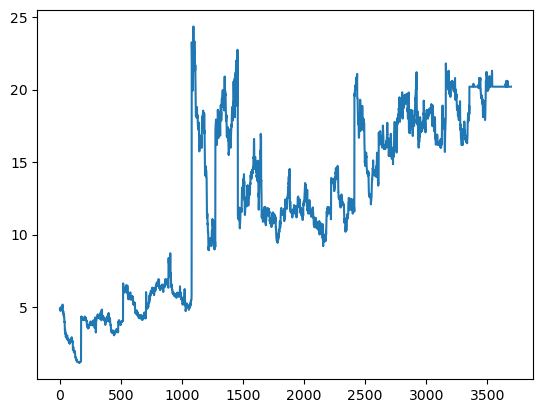

In [10]:
plt.plot(df1)

In [11]:
# LSTM

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [14]:
df1

array([[0.16105354],
       [0.16148532],
       [0.15414508],
       ...,
       [0.82081174],
       [0.82081174],
       [0.82081174]])

In [15]:
df1.shape

(3695, 1)

In [16]:
# splitting dataset (80%)

training_size = int(len(df1) * 0.80)
test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size, :], df1[training_size:, :1]

In [17]:
training_size, test_size

(2956, 739)

In [18]:
len(train_data), len(test_data)

(2956, 739)

In [19]:
train_data

array([[0.16105354],
       [0.16148532],
       [0.15414508],
       ...,
       [0.70941278],
       [0.69300518],
       [0.68868739]])

In [20]:
import numpy
#convert the array values in matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - time_step - 1):  
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
#teshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [22]:
print(X_train)

[[0.16105354 0.16148532 0.15414508 ... 0.06994819 0.06303972 0.06303972]
 [0.16148532 0.15414508 0.15414508 ... 0.06303972 0.06303972 0.06174439]
 [0.15414508 0.15414508 0.15846287 ... 0.06303972 0.06174439 0.06131261]
 ...
 [0.74740933 0.74309154 0.76468048 ... 0.67659758 0.73013817 0.71329879]
 [0.74309154 0.76468048 0.78195164 ... 0.73013817 0.71329879 0.71329879]
 [0.76468048 0.78195164 0.80354059 ... 0.71329879 0.71329879 0.70941278]]


In [23]:
print(X_test.shape),print(y_test.shape)

(638, 100)
(638,)


(None, None)

In [24]:
print(X_train.shape),print(y_train.shape)

(2855, 100)
(2855,)


(None, None)

In [25]:
#reshape
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [26]:
#Create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [27]:
model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, features)))
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

# Add the second LSTM layer with return_sequences=True
model.add(LSTM(50, return_sequences=True))

# Add the third LSTM layer with return_sequences=False (last layer in the stack)
model.add(LSTM(50))

# Add a dense output layer (you can adjust the number of units based on your problem)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100

45/45 [==============================] - 7s 91ms/step - loss: 0.0246 - val_loss: 0.0011
Epoch 2/100
45/45 [==============================] - 3s 66ms/step - loss: 0.0037 - val_loss: 9.1180e-04
Epoch 3/100
45/45 [==============================] - 3s 67ms/step - loss: 0.0034 - val_loss: 7.8827e-04
Epoch 4/100
45/45 [==============================] - 3s 67ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 5/100
45/45 [==============================] - 3s 68ms/step - loss: 0.0024 - val_loss: 7.8956e-04
Epoch 6/100
45/45 [==============================] - 3s 69ms/step - loss: 0.0023 - val_loss: 6.9148e-04
Epoch 7/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0022 - val_loss: 9.7672e-04
Epoch 8/100
45/45 [==============================] - 3s 58ms/step - loss: 0.0021 - val_loss: 9.5506e-04
Epoch 9/100
45/45 [==============================] - 2s 54ms/step - loss: 0.0019 - val_loss: 4.9515e-04
Epoch 10/100
45/45 [==============================] - 2s 53ms/step - lo

45/45 [==============================] - 3s 68ms/step - loss: 6.0728e-04 - val_loss: 1.6873e-04
Epoch 76/100
45/45 [==============================] - 3s 70ms/step - loss: 6.3134e-04 - val_loss: 1.9167e-04
Epoch 77/100
45/45 [==============================] - 3s 67ms/step - loss: 5.8825e-04 - val_loss: 2.1868e-04
Epoch 78/100
45/45 [==============================] - 3s 67ms/step - loss: 5.8339e-04 - val_loss: 5.0586e-04
Epoch 79/100
45/45 [==============================] - 3s 67ms/step - loss: 6.2079e-04 - val_loss: 2.2889e-04
Epoch 80/100
45/45 [==============================] - 3s 68ms/step - loss: 5.8468e-04 - val_loss: 3.0460e-04
Epoch 81/100
45/45 [==============================] - 3s 70ms/step - loss: 6.5468e-04 - val_loss: 4.6589e-04
Epoch 82/100
45/45 [==============================] - 3s 69ms/step - loss: 5.9183e-04 - val_loss: 2.6269e-04
Epoch 83/100
45/45 [==============================] - 3s 67ms/step - loss: 6.2013e-04 - val_loss: 1.6974e-04
Epoch 84/100
45/45 [============

In [30]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [31]:
# checking prediction for the performance matrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 0s 17ms/step


In [32]:
# transfromback to orginal form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
# Calculate Root Mean Squared Error (RMSE)
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, train_predict)
rmse = math.sqrt(mse)

In [34]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 139.24025032507012
Root Mean Squared Error: 11.80001060698973


In [35]:
# test data
mse = mean_squared_error(y_test, test_predict)
rmse = math.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 336.56203306478284
Root Mean Squared Error: 18.345627082898606


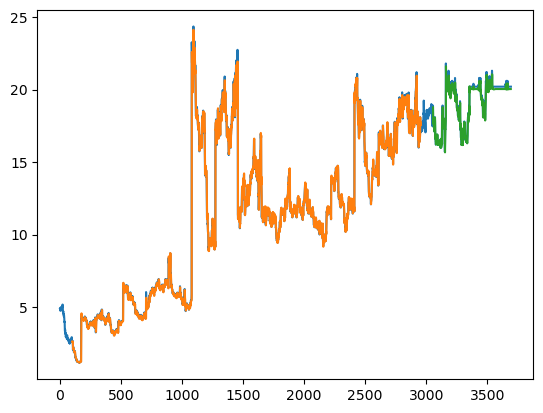

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

739

In [38]:
x_input=test_data[639:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443868739,
 0.8208117443

In [41]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8137602]
101
1 day input [0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82512953 0.82944732 0.82512953 0.82944732 0.82081174 0.82512953
 0.83376511 0.8380829  0.82944732 0.82944732 0.8380829  0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.8380829  0.82512953
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 

10 day output [[0.768478]]
11 day input [0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82512953 0.82944732 0.82512953 0.82944732
 0.82081174 0.82512953 0.83376511 0.8380829  0.82944732 0.82944732
 0.8380829  0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.8380829  0.82512953 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174

20 day output [[0.7355746]]
21 day input [0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82512953 0.82944732
 0.82512953 0.82944732 0.82081174 0.82512953 0.83376511 0.8380829
 0.82944732 0.82944732 0.8380829  0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.8380829  0.82512953 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174 0.82081174
 0.82081174 0.81376022 0.80708158 0.80176657 0.79665619 0.79208553
 0.78783065 0.78380406

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

3695

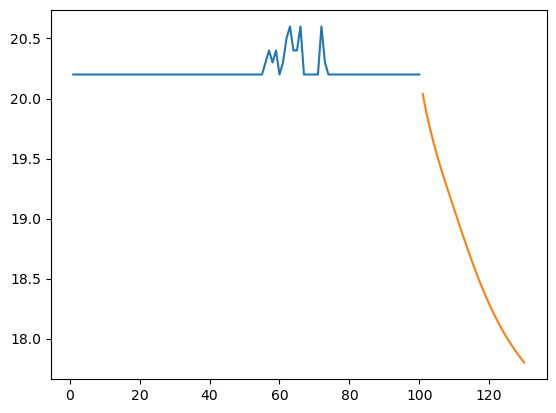

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[3595:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

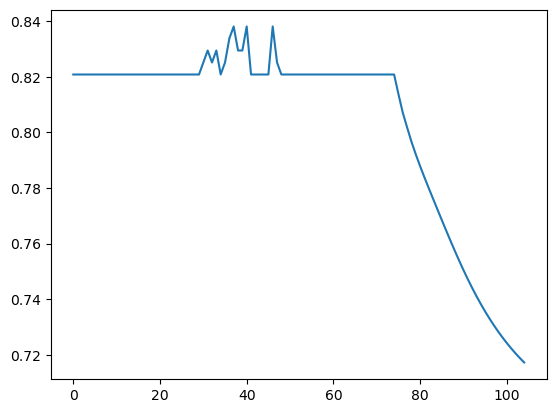

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3620:])

In [47]:
df3=scaler.inverse_transform(df3).tolist()

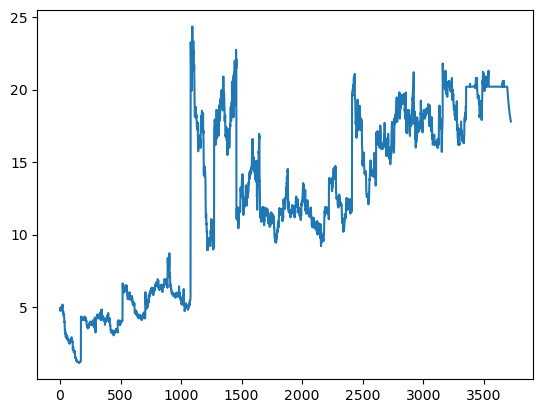

In [48]:
plt.plot(df3)